In [1]:
import os
import pickle as pkl
import pandas as pd
import numpy as np

import pydeseq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [2]:
# Loading the data from package
DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/datasets/"
counts_df = pd.read_csv(os.path.join(DATA_PATH, "rna_counts_cnv.csv"), index_col=0)
counts_df = counts_df.T
metadata = pd.read_csv(os.path.join(DATA_PATH, "metadata.csv"), index_col=0)

In [27]:
# Test real data
DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/TCGA/lung_cancer/LUAD/"
counts_df = pd.read_csv(os.path.join(DATA_PATH, "rna_test_3.csv"), index_col=0)
counts_df = counts_df.T
metadata = pd.read_csv(os.path.join(DATA_PATH, "metadata_3.csv"), index_col=0)

In [3]:
#Data filtering
#genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
#counts_df = counts_df[genes_to_keep]
counts_df.shape

(20, 1000)

In [4]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design_factors="condition",
    refit_cooks=False,
    inference=inference,
)

In [5]:
dds.fit_size_factors()

Fitting size factors...
... done in 0.00 seconds.



In [6]:
dds.obsm["size_factors"]

array([1.0817345 , 1.10680092, 1.01007732, 1.0496627 , 1.03442905,
       1.03982867, 1.04228893, 1.06156191, 1.03024459, 1.04868554,
       0.98184938, 1.05550931, 1.07347973, 1.03528044, 0.94830907,
       1.04864958, 1.01057704, 1.01872342, 1.0096696 , 1.01212212])

In [7]:
dds.fit_genewise_dispersions()

Fitting dispersions...
... done in 0.11 seconds.



In [8]:
dds.varm["genewise_dispersions"]

array([0.45827254, 0.62720442, 0.71164692, 0.38464993, 0.35900077,
       0.26281251, 0.5150476 , 0.32135897, 0.27634015, 0.45897571,
       0.47399599, 0.32867644, 0.40238427, 0.37981705, 0.58701884,
       0.45603752, 0.68006638, 0.80682342, 0.33639914, 0.44959304,
       0.55332545, 0.47317125, 0.42579178, 0.67583722, 0.29135344,
       0.45295978, 0.48339271, 0.30733344, 0.51314536, 0.74513601,
       0.4153763 , 0.36146889, 0.55992918, 1.57295627, 0.31212404,
       0.14510592, 0.30192501, 0.45409391, 1.19093694, 0.49038585,
       0.46089879, 0.54677465, 0.46968328, 0.64615476, 0.50786072,
       0.59116602, 0.25517112, 0.32556248, 0.27373747, 0.36450403,
       0.32542206, 0.61622337, 0.38358186, 0.49326463, 0.36177952,
       0.30701501, 0.64695727, 0.44248036, 0.29756916, 0.6605333 ,
       0.4244782 , 0.37339554, 0.19289663, 0.40871748, 0.45412474,
       0.668418  , 0.58229164, 0.54518247, 0.2572472 , 0.34705858,
       0.46006396, 0.37344837, 0.51506658, 0.30358406, 0.13723

In [9]:
dds.fit_dispersion_trend()

Fitting dispersion trend curve...
... done in 0.04 seconds.



In [10]:
#dds.uns["trend_coeffs"]
dds.varm["fitted_dispersions"]

array([0.26984542, 0.42915036, 0.4883593 , 0.46681978, 0.37671165,
       0.29274592, 0.37020775, 0.44252176, 0.27795493, 0.28831962,
       0.29951709, 0.30746892, 0.31413918, 0.37777009, 0.31067087,
       0.40958143, 0.57379433, 0.29383984, 0.31668612, 0.29156631,
       0.7807075 , 0.35782071, 0.29292022, 0.29847985, 0.28506395,
       0.33526917, 0.29192491, 0.32562217, 0.30621785, 0.43797433,
       0.27758032, 0.30327861, 0.46175082, 1.21304856, 0.36223654,
       0.28165429, 0.3207761 , 0.30476229, 0.68486574, 0.28064354,
       0.29522532, 0.39331636, 0.27583838, 0.52436896, 0.31395906,
       0.28878086, 0.27847089, 0.39132922, 0.36969366, 0.32008775,
       0.29643929, 0.31807641, 0.27905996, 0.29321579, 0.39130641,
       0.28736717, 0.3685989 , 0.29647423, 0.28543845, 0.39385882,
       0.36590398, 0.27432004, 0.28779627, 0.29477966, 0.39461516,
       0.34224835, 0.43104411, 0.30845799, 0.29569638, 0.295675  ,
       0.33532687, 0.38738963, 0.36857554, 0.2982765 , 0.28769

In [11]:
dds.fit_dispersion_prior()
print(
    f"logres_prior={dds.uns['_squared_logres']}, sigma_prior={dds.uns['prior_disp_var']}"
)

logres_prior=0.13221910958143823, sigma_prior=0.25


In [12]:
dds.fit_MAP_dispersions()

Fitting MAP dispersions...
... done in 0.17 seconds.



In [13]:
dds.varm["MAP_dispersions"]

array([0.39839691, 0.56420017, 0.64036212, 0.40935752, 0.36427742,
       0.27136178, 0.47004604, 0.35638691, 0.27680958, 0.40523476,
       0.41883533, 0.32233596, 0.37491343, 0.37917558, 0.49532402,
       0.44161366, 0.64603756, 0.63144335, 0.33053602, 0.40009289,
       0.62220685, 0.43743279, 0.38448549, 0.55015632, 0.28951999,
       0.41591249, 0.42235753, 0.31269878, 0.44699116, 0.64723713,
       0.37236411, 0.34377563, 0.5292318 , 1.46056818, 0.32681283,
       0.17969057, 0.30755204, 0.40714416, 1.01948135, 0.42331826,
       0.40869743, 0.49920005, 0.40796042, 0.60922044, 0.44511946,
       0.49182235, 0.26181338, 0.34458715, 0.30131555, 0.35107651,
       0.3168155 , 0.51820168, 0.35144755, 0.42953811, 0.37058987,
       0.30118531, 0.55791281, 0.3966128 , 0.29399869, 0.57415689,
       0.40630642, 0.34302968, 0.21838254, 0.37346568, 0.43560378,
       0.56188598, 0.5352077 , 0.46902238, 0.26816446, 0.33159609,
       0.421132  , 0.37772986, 0.46677255, 0.30200393, 0.17521

In [14]:
dds.varm["dispersions"]

array([0.39839691, 0.56420017, 0.64036212, 0.40935752, 0.36427742,
       0.27136178, 0.47004604, 0.35638691, 0.27680958, 0.40523476,
       0.41883533, 0.32233596, 0.37491343, 0.37917558, 0.49532402,
       0.44161366, 0.64603756, 0.80682342, 0.33053602, 0.40009289,
       0.62220685, 0.43743279, 0.38448549, 0.67583722, 0.28951999,
       0.41591249, 0.42235753, 0.31269878, 0.44699116, 0.64723713,
       0.37236411, 0.34377563, 0.5292318 , 1.46056818, 0.32681283,
       0.17969057, 0.30755204, 0.40714416, 1.01948135, 0.42331826,
       0.40869743, 0.49920005, 0.40796042, 0.60922044, 0.44511946,
       0.49182235, 0.26181338, 0.34458715, 0.30131555, 0.35107651,
       0.3168155 , 0.51820168, 0.35144755, 0.42953811, 0.37058987,
       0.30118531, 0.55791281, 0.3966128 , 0.29399869, 0.57415689,
       0.40630642, 0.34302968, 0.21838254, 0.37346568, 0.43560378,
       0.56188598, 0.5352077 , 0.46902238, 0.26816446, 0.33159609,
       0.421132  , 0.37772986, 0.46677255, 0.30200393, 0.17521

In [15]:
dds.fit_LFC()

Fitting LFCs...
... done in 0.09 seconds.



In [16]:
dds.varm["LFC"]

,intercept,condition_B_vs_A
G1,8.652171,-0.087313
G2,4.091364,-0.246581
G3,3.608694,0.104578
G4,4.055547,-0.702506
G5,4.449594,-0.166175
...,...,...
G996,5.624118,0.804272
G997,7.123946,0.449796
G998,5.795290,1.066612
G999,6.147894,0.212974


In [17]:
# Statistical analysis
stat_res = DeseqStats(dds, alpha=0.05, cooks_filter=False, independent_filter=True)

In [18]:
stat_res.run_wald_test()

Running Wald tests...
... done in 0.08 seconds.



In [19]:
stat_res.p_values

G1       7.571323e-01
G2       4.700911e-01
G3       7.743380e-01
G4       1.720424e-02
G5       5.448575e-01
             ...     
G996     3.556116e-04
G997     2.649529e-02
G998     7.661450e-07
G999     2.814691e-01
G1000    3.903864e-02
Length: 1000, dtype: float64

In [20]:
# p-value adjustment

if stat_res.independent_filter:
    stat_res._independent_filtering()
else:
    stat_res._p_value_adjustment()

stat_res.padj

G1       0.815875
G2       0.571192
G3       0.825460
G4       0.042639
G5       0.636729
           ...   
G996     0.002075
G997     0.059010
G998     0.000018
G999     0.384521
G1000    0.081161
Name: 0, Length: 1000, dtype: float64

In [21]:
stat_res.summary()

Log2 fold change & Wald test p-value: condition B vs A
          baseMean  log2FoldChange     lfcSE      stat        pvalue      padj
G1     5483.345668       -0.125966  0.407328 -0.309249  7.571323e-01  0.815875
G2       53.273471       -0.355742  0.492492 -0.722331  4.700911e-01  0.571192
G3       38.940902        0.150874  0.526234  0.286705  7.743380e-01  0.825460
G4       43.165640       -1.013502  0.425428 -2.382314  1.720424e-02  0.042639
G5       79.037687       -0.239740  0.395948 -0.605484  5.448575e-01  0.636729
...            ...             ...       ...       ...           ...       ...
G996    448.120920        1.160320  0.324928  3.571007  3.556116e-04  0.002075
G997   1593.890327        0.648919  0.292454  2.218874  2.649529e-02  0.059010
G998    641.953647        1.538796  0.311258  4.943799  7.661450e-07  0.000018
G999    523.254006        0.307257  0.285283  1.077025  2.814691e-01  0.384521
G1000   882.841110        0.654288  0.317034  2.063779  3.903864e-02  0.0811

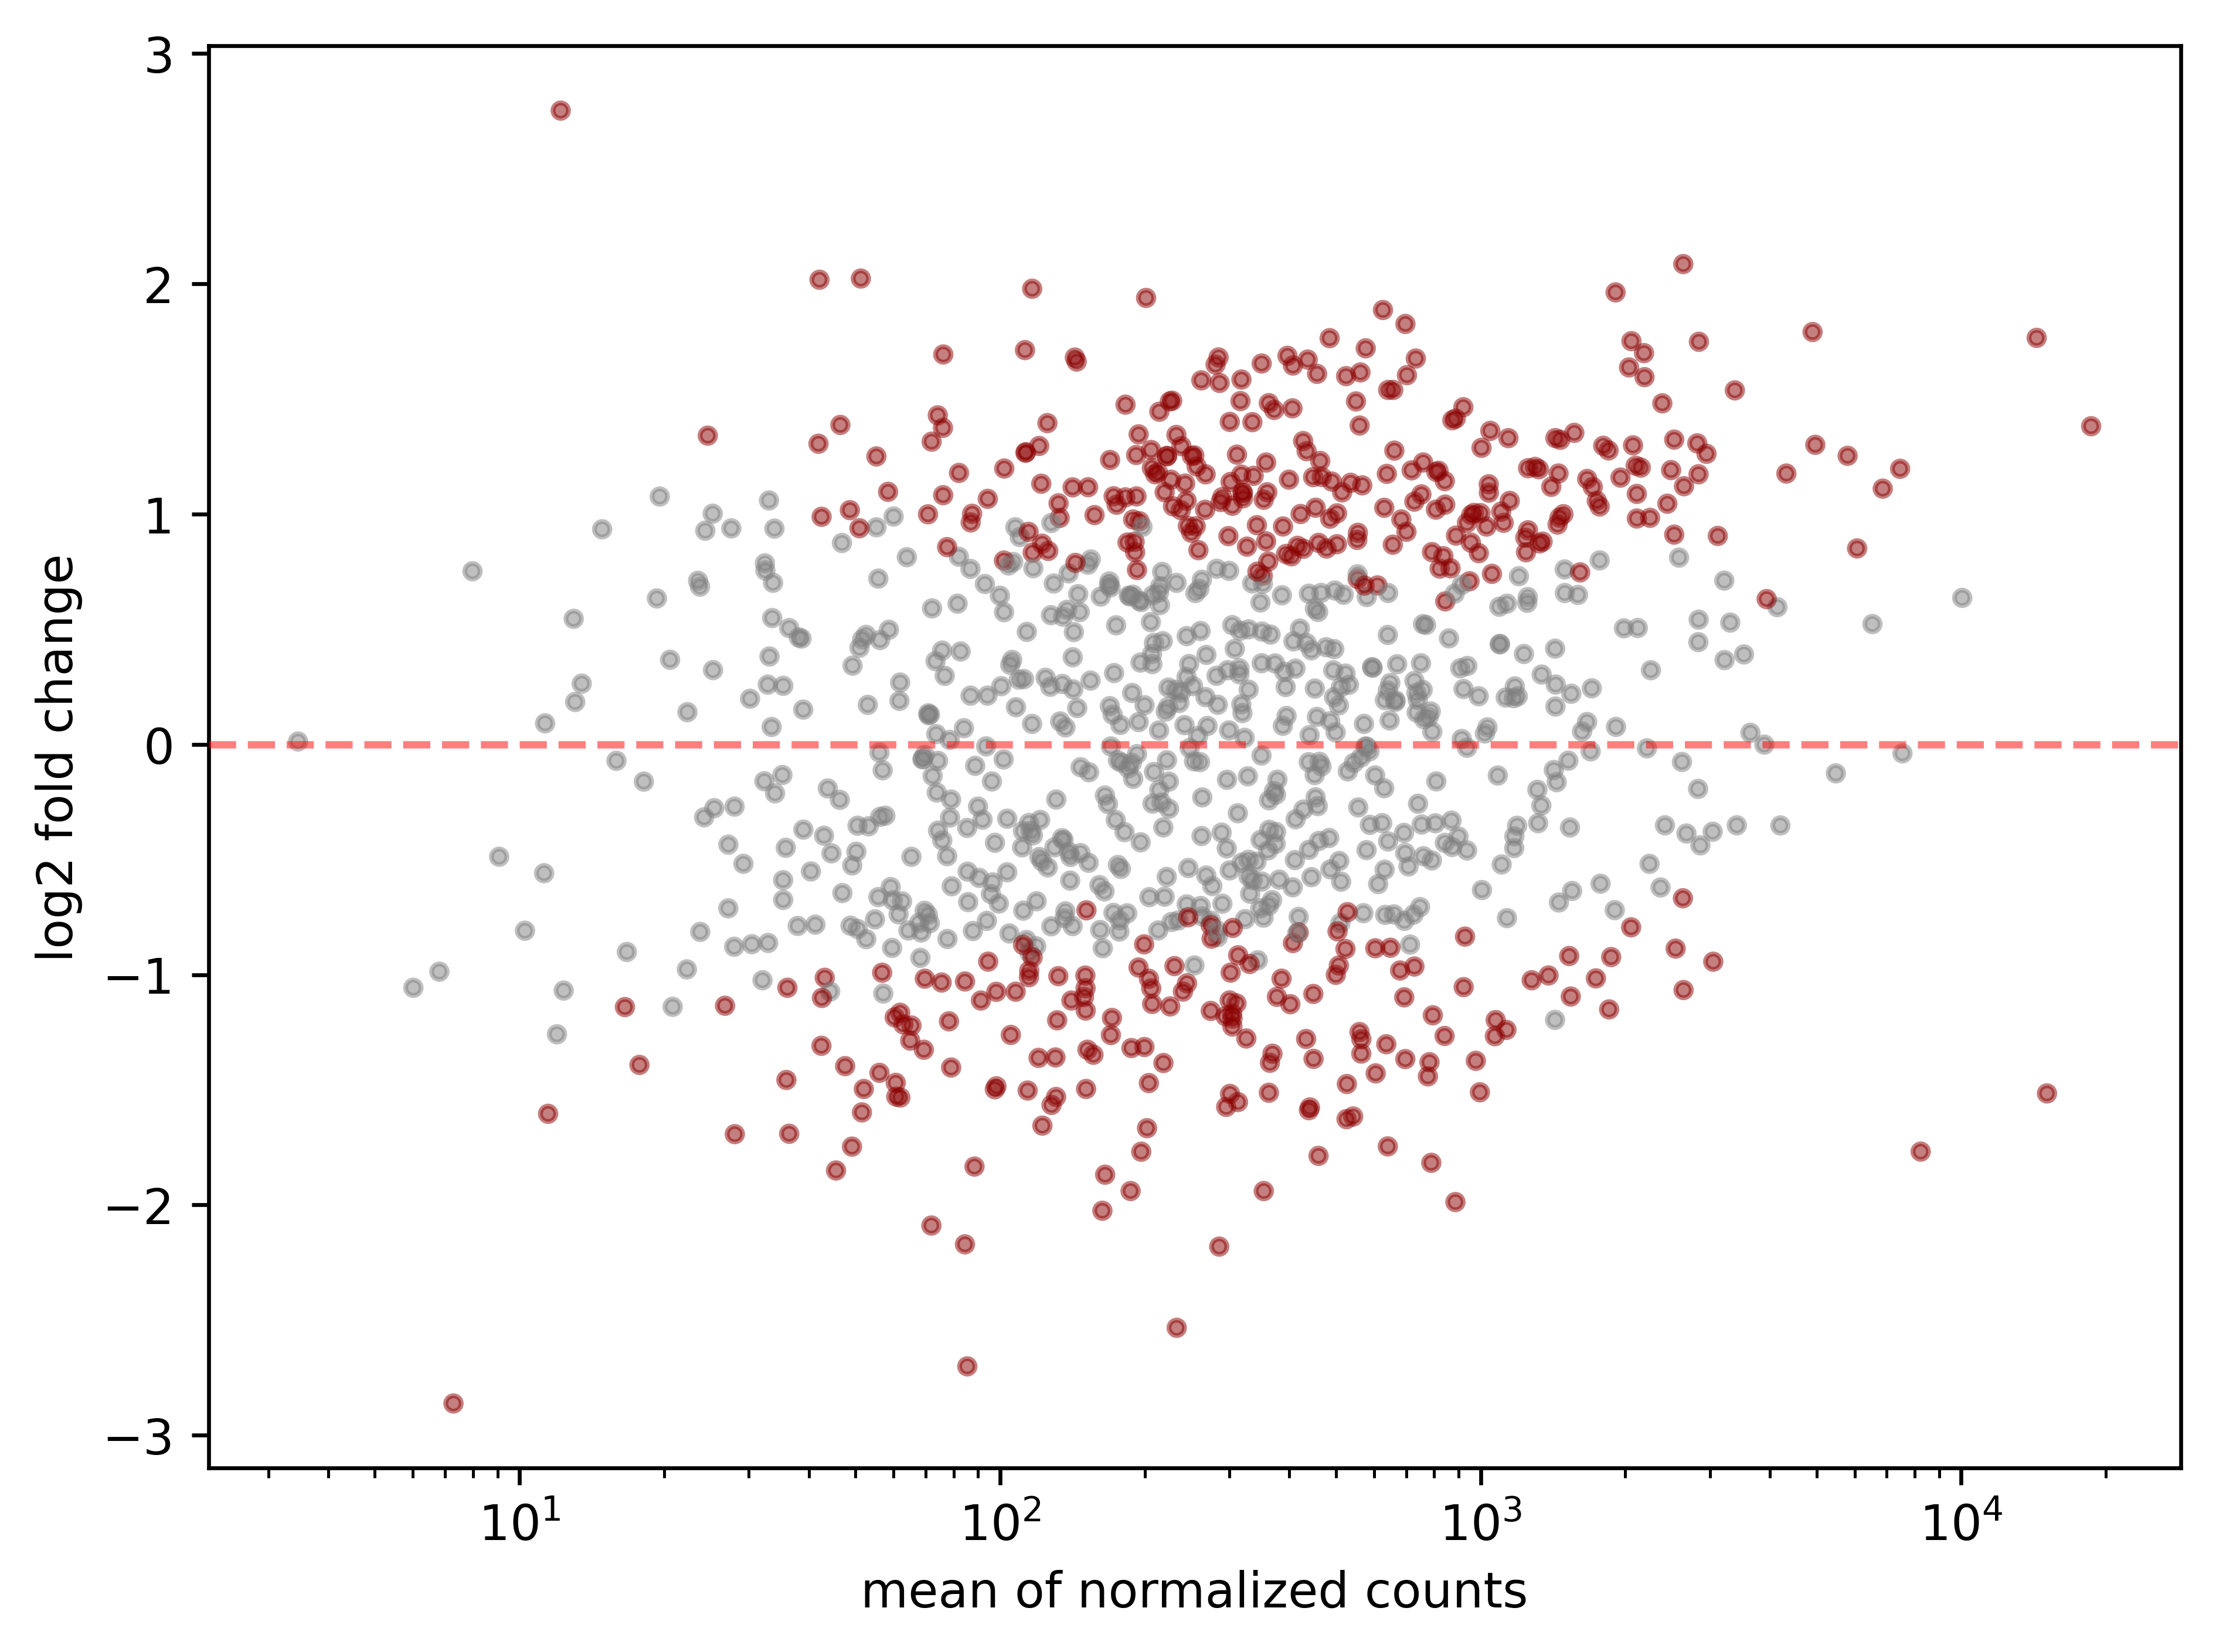

In [22]:
stat_res.plot_MA(s=10)

In [23]:
stat_res.lfc_shrink(coeff="condition_B_vs_A")

Shrunk log2 fold change & Wald test p-value: condition B vs A
          baseMean  log2FoldChange     lfcSE      stat        pvalue      padj
G1     5483.345668       -0.075006  0.367772 -0.309249  7.571323e-01  0.815875
G2       53.273471       -0.215480  0.432866 -0.722331  4.700911e-01  0.571192
G3       38.940902        0.085898  0.449424  0.286705  7.743380e-01  0.825460
G4       43.165640       -0.796834  0.424698 -2.382314  1.720424e-02  0.042639
G5       79.037687       -0.167336  0.361161 -0.605484  5.448575e-01  0.636729
...            ...             ...       ...       ...           ...       ...
G996    448.120920        1.026902  0.327322  3.571007  3.556116e-04  0.002075
G997   1593.890327        0.531269  0.287859  2.218874  2.649529e-02  0.059010
G998    641.953647        1.444810  0.314022  4.943799  7.661450e-07  0.000018
G999    523.254006        0.253865  0.273850  1.077025  2.814691e-01  0.384521
G1000   882.841110        0.549019  0.311136  2.063779  3.903864e-02 

Fitting MAP LFCs...
... done in 0.16 seconds.



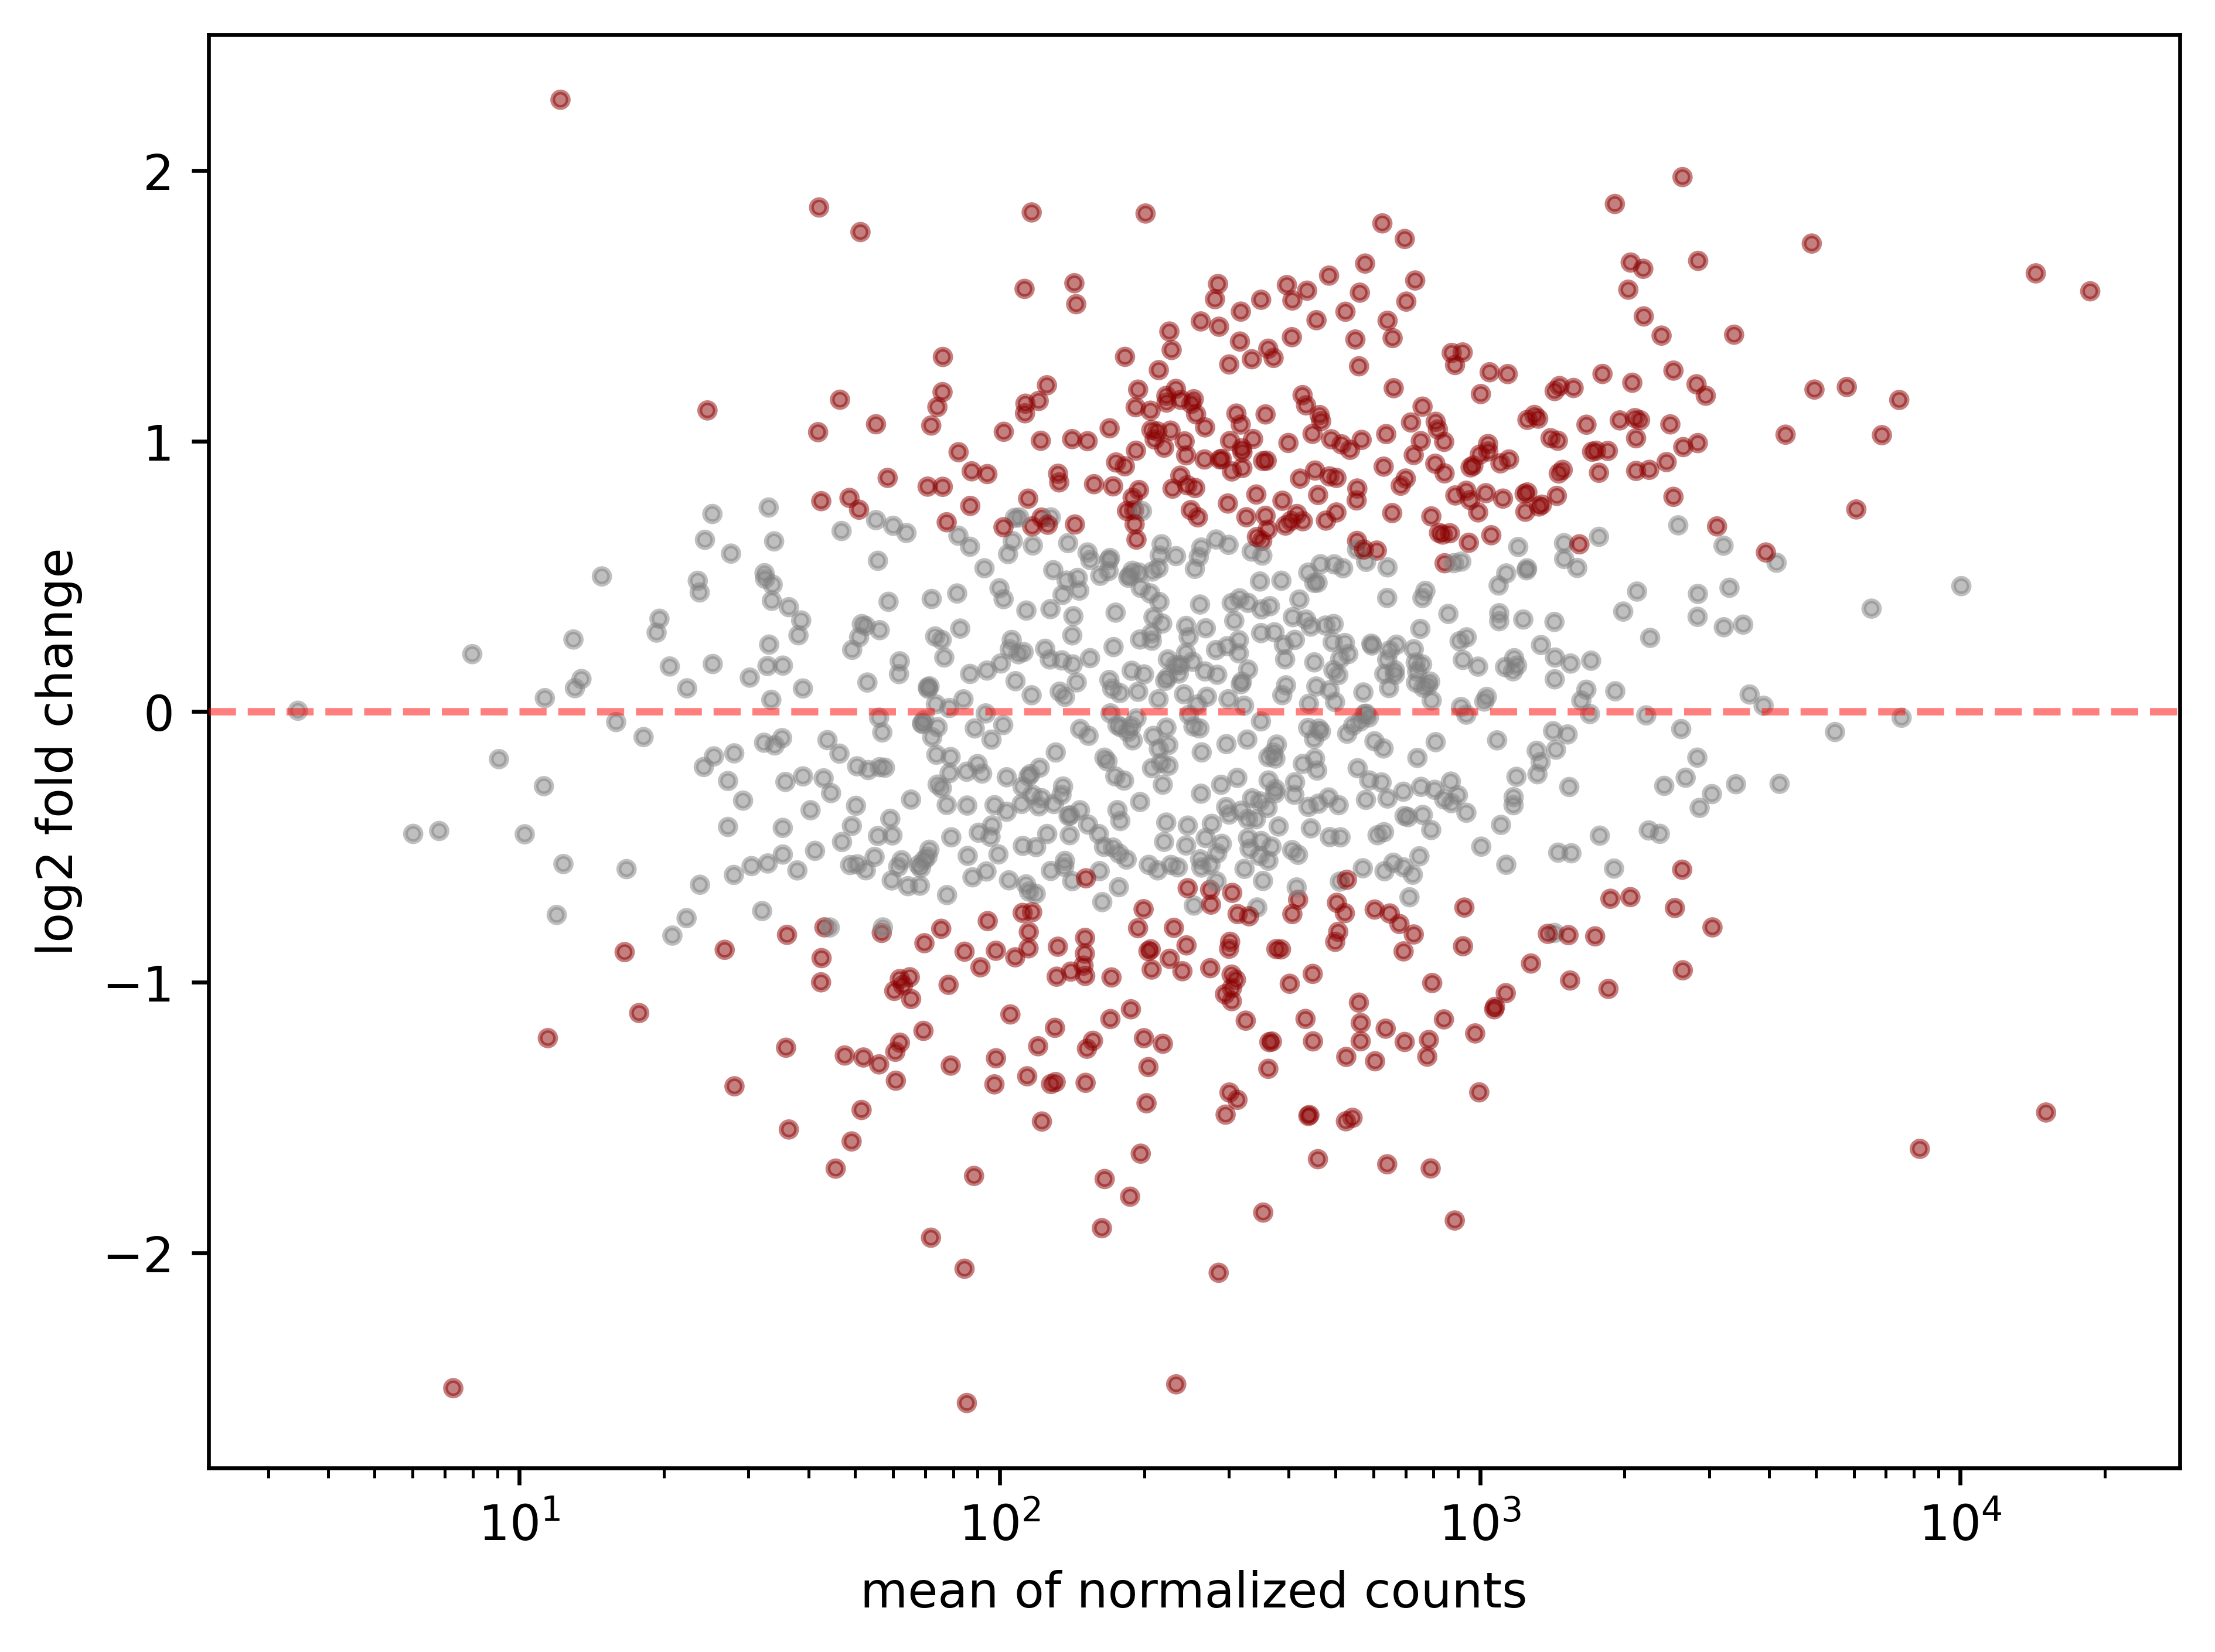

In [24]:
stat_res.plot_MA(s=10)

In [25]:
#Save results
OUTPUT_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/results"
os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist
stat_res.results_df.to_csv(os.path.join(OUTPUT_PATH, "res_CNnaive_sim.csv"))